# Take-home Midterm (50 points)
The dataset contains weekly sales and other information for 45 different Walmart stores. Do some EDA and data cleansing to fix some formatting issues.


1.Which store/s has good quarterly growth rate in Q3’2012?

2.which store has maximum weekly sales?

3.Do holidays have impact on sales? negative or positive?

4.Draw scatter plot of monthly sales and provide your observations

5.1 Can you predict Weekly Sales using other columns, either with a Random Forest Algorithm or a Support Vector Machine? 

5.2 Sometimes predictions from other columns is challenging. In that case, model Weekly Sales column for years 2010 and 2011 with pymc3 and use that model to predict sales for every month in 2012. It's ok if your histogram is not exactly simgle-humped, as long as a single hump is a sufficiently good approximation.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.pyplot import *
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import  r2_score

In [2]:
# load the dataset from local storage
data = pd.read_csv("../../data/WALMART_SALES_DATA.csv")

In [3]:
# Show first five data
data.head() 

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
# Show last five data
data.tail() 

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [5]:
# Understanding the basic ground information of data
def all_about_my_data(data):
    
    # Shape of the dataframe
    print("Number of Instances:",data.shape[0])
    print("Number of Features:",data.shape[1])
    
    # Summary Stats
    print("\nSummary Stats:")
    print(data.describe())
    
    # Feature Names
    print("\nFeature Names:")
    print(data.columns)
    
    # Unique values
    print("\nUnique values:")
    print(data.nunique())
    
    # Missing Values
    print("\nMissing Values:")
    print(data.isna().sum())

all_about_my_data(data)

Number of Instances: 6435
Number of Features: 8

Summary Stats:
             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%   

In summary, our dataset has a total of **6435 instances** and **8 features**. The format of **feature names** is fine and there are **no missing values**.

In [6]:
# Add "Year" and "Month" columns
data['Year'] = data['Date'].str[6:10]
data['Month'] = data['Date'].str[3:5]
data['Month'] = data['Month'].astype('int64')
data['Year'] = data['Year'].astype('int64')

In [7]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3


In [8]:
# Filter the required columns
data_sales = data[['Store','Year','Month','Weekly_Sales','Holiday_Flag']]

### Q1:Which store/s has good quarterly growth rate in Q3’2012?

In [9]:
# Select sales data for the second quarter of 2012
data_q2 = data_sales[data_sales['Year'].isin([2012]) & data_sales['Month'].isin([4,5,6])]
data_q2.head()

,Store,Year,Month,Weekly_Sales,Holiday_Flag
113,1,2012,4,1899676.88,0
114,1,2012,4,1621031.70,0
115,1,2012,4,1521577.87,0
116,1,2012,4,1468928.37,0
117,1,2012,5,1684519.99,0


In [10]:
# Select sales data for the third quarter of 2012
data_q3 = data_sales[data_sales['Year'].isin([2012]) & data_sales['Month'].isin([7,8,9])]
data_q3.head()

,Store,Year,Month,Weekly_Sales,Holiday_Flag
126,1,2012,7,1769854.16,0
127,1,2012,7,1527014.04,0
128,1,2012,7,1497954.76,0
129,1,2012,7,1439123.71,0
130,1,2012,8,1631135.79,0


In [11]:
# Calculate total sales for the second and third quarters of 2012, respectively
q2_sales = data_q2['Weekly_Sales'].groupby(data_q2['Store']).sum()
q3_sales = data_q3['Weekly_Sales'].groupby(data_q3['Store']).sum()

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


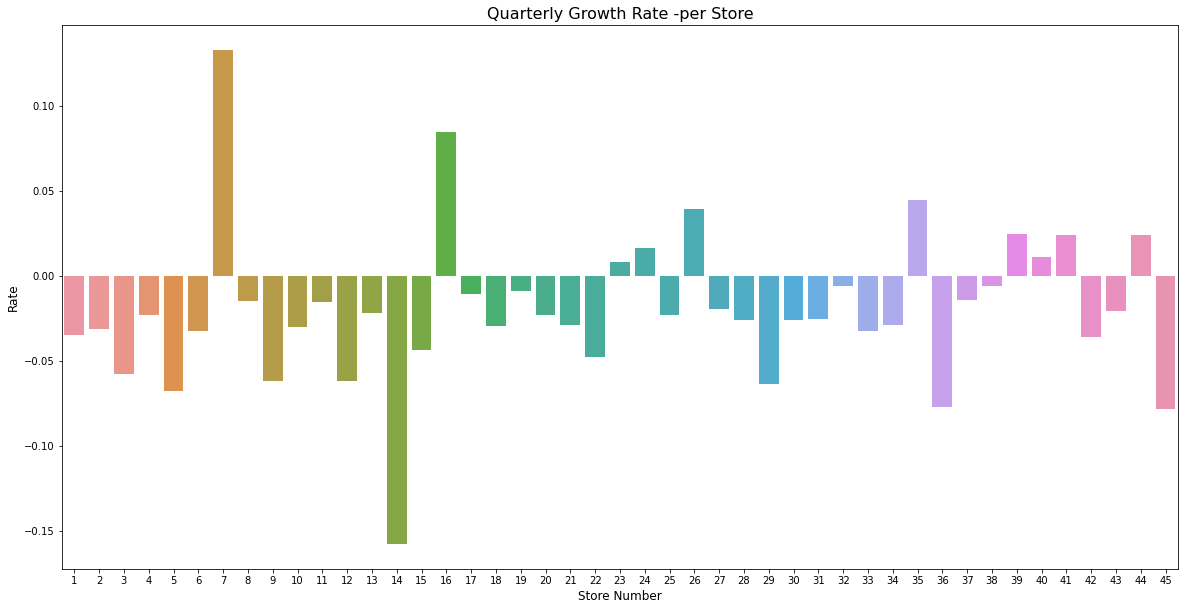

In [12]:
# Calculate the growth rate for each store
growth = (q3_sales - q2_sales)/q2_sales
plt.figure(figsize=(20,10))
sns.barplot(growth.index, growth.values)
plt.title('Quarterly Growth Rate -per Store', fontsize=16)
plt.ylabel('Rate', fontsize=12)
plt.xlabel('Store Number', fontsize=12)
plt.show()

From the graph we can see that the growth rate is positive for the following stores：**Store 7,16,23,24,26,35,39,40,41,44** (They have good quarterly growth rate).

### Q2:Which store has maximum weekly sales?

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


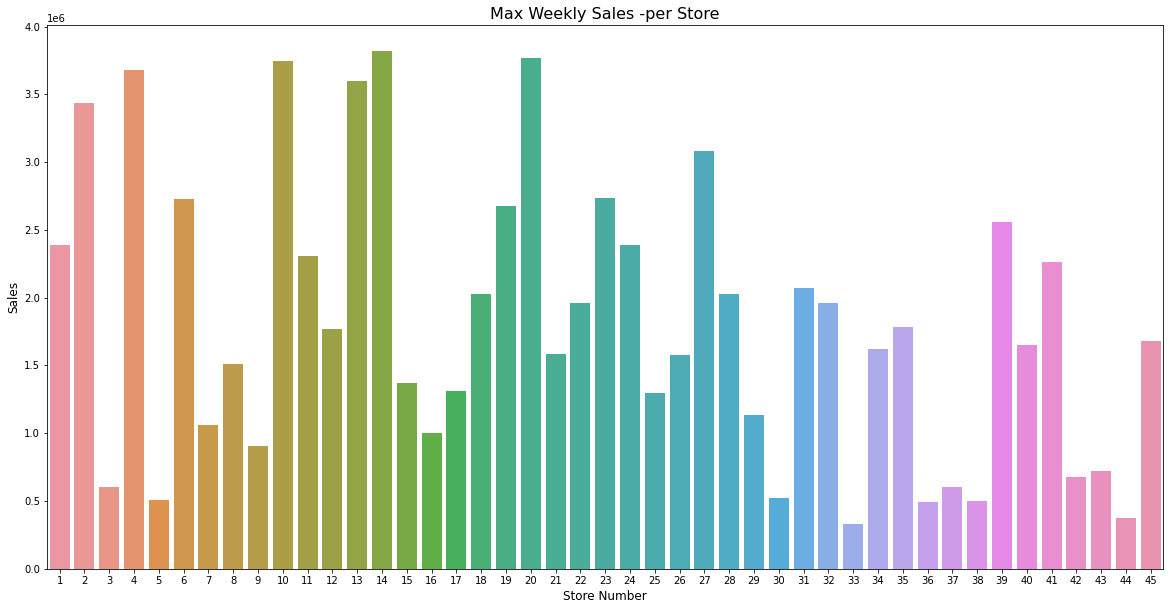

In [13]:
# Select the maximum Weekly Sales for each store
max_weekly_sales = data_sales['Weekly_Sales'].groupby(data_sales['Store']).max()
plt.figure(figsize=(20,10))
sns.barplot(max_weekly_sales.index, max_weekly_sales.values)
plt.title('Max Weekly Sales -per Store', fontsize=16)
plt.ylabel('Sales', fontsize=12)
plt.xlabel('Store Number', fontsize=12)
plt.show()

In [14]:
max_weekly_sales.idxmax()

14

**Store 14** has maximum weekly sales.

### Q3:Do holidays have impact on sales? negative or positive?

In [15]:
# Select sales data for the holiday weeks
data_holiday = data_sales[data_sales['Holiday_Flag'].isin([1])]
data_holiday.head()

,Store,Year,Month,Weekly_Sales,Holiday_Flag
1,1,2010,2,1641957.44,1
31,1,2010,9,1507460.69,1
42,1,2010,11,1955624.11,1
47,1,2010,12,1367320.01,1
53,1,2011,2,1649614.93,1


In [16]:
# Select sales data for non-holiday weeks
data_no_holiday = data_sales[data_sales['Holiday_Flag'].isin([0])]
data_no_holiday.head()

,Store,Year,Month,Weekly_Sales,Holiday_Flag
0,1,2010,2,1643690.90,0
2,1,2010,2,1611968.17,0
3,1,2010,2,1409727.59,0
4,1,2010,3,1554806.68,0
5,1,2010,3,1439541.59,0


In [17]:
# Calculate the average sales for the holiday weeks
mean_holiday_sales = data_holiday['Weekly_Sales'].mean()
mean_holiday_sales

1122887.8923555554

In [18]:
# Calculate the average sales for the non-holiday weeks
mean_no_holiday_sales = data_no_holiday['Weekly_Sales'].mean()
mean_no_holiday_sales

1041256.3802088564

From the calculation results, it can be seen that the **Overall** sales of **holiday** weeks are **greater** than the sales of **non-holiday** weeks.

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


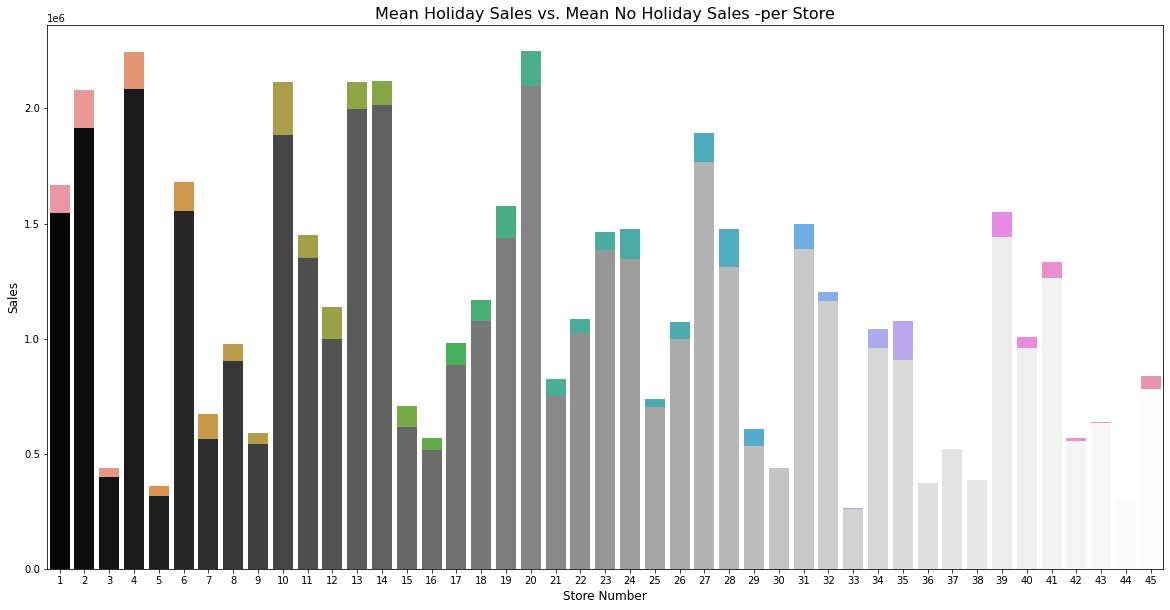

In [19]:
# Calculate the average sales for the holiday weeks(per store)
mean_holiday_sales_store = data_holiday['Weekly_Sales'].groupby(data_holiday['Store']).mean()
# Calculate the average sales for the non-holiday weeks(per store)
mean_no_holiday_sales_store = data_no_holiday['Weekly_Sales'].groupby(data_no_holiday['Store']).mean()
plt.figure(figsize=(20,10))
sns.barplot(mean_holiday_sales_store.index, mean_holiday_sales_store.values)
sns.barplot(mean_no_holiday_sales_store.index, mean_no_holiday_sales_store.values,palette='Greys_r')
plt.title('Mean Holiday Sales vs. Mean No Holiday Sales -per Store', fontsize=16)
plt.ylabel('Sales', fontsize=12)
plt.xlabel('Store Number', fontsize=12)
plt.show()

For every store other than store 30,36,37,38,44, **holiday** week sales are **greater** than **non-holiday** week sales.  
In summary, holidays have **positive** impact on sales.

### Q4:Draw scatter plot of monthly sales and provide your observations

In [20]:
# Calculate and add the 'Monthly_Sales' column
data_sales['Monthly_Sales'] = data_sales.groupby(['Store','Year','Month'])['Weekly_Sales'].transform('sum')

<ipython-input-20-7fb1a9655562>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sales['Monthly_Sales'] = data_sales.groupby(['Store','Year','Month'])['Weekly_Sales'].transform('sum')


In [21]:
data_sales.head()

,Store,Year,Month,Weekly_Sales,Holiday_Flag,Monthly_Sales
0,1,2010,2,1643690.90,0,6307344.10
1,1,2010,2,1641957.44,1,6307344.10
2,1,2010,2,1611968.17,0,6307344.10
3,1,2010,2,1409727.59,0,6307344.10
4,1,2010,3,1554806.68,0,5871293.98


In [22]:
# Delete duplicate rows
data_monthly_sales = data_sales[['Store','Year','Month','Monthly_Sales']].drop_duplicates(subset='Monthly_Sales')

In [23]:
data_monthly_sales.head()

,Store,Year,Month,Monthly_Sales
0,1,2010,2,6307344.10
4,1,2010,3,5871293.98
8,1,2010,4,7422801.92
13,1,2010,5,5929938.64
17,1,2010,6,6084081.46


In [24]:
# Add 'Year-Month' column
data_monthly_sales['Month'] = data_monthly_sales['Month'].astype(str)
data_monthly_sales['Year'] = data_monthly_sales['Year'].astype(str)
data_monthly_sales['Year-Month'] = data_monthly_sales['Year'].str[0:4] + '-' + data_monthly_sales['Month'].str[0:2]
data_monthly_sales.head()

,Store,Year,Month,Monthly_Sales,Year-Month
0,1,2010,2,6307344.10,2010-2
4,1,2010,3,5871293.98,2010-3
8,1,2010,4,7422801.92,2010-4
13,1,2010,5,5929938.64,2010-5
17,1,2010,6,6084081.46,2010-6


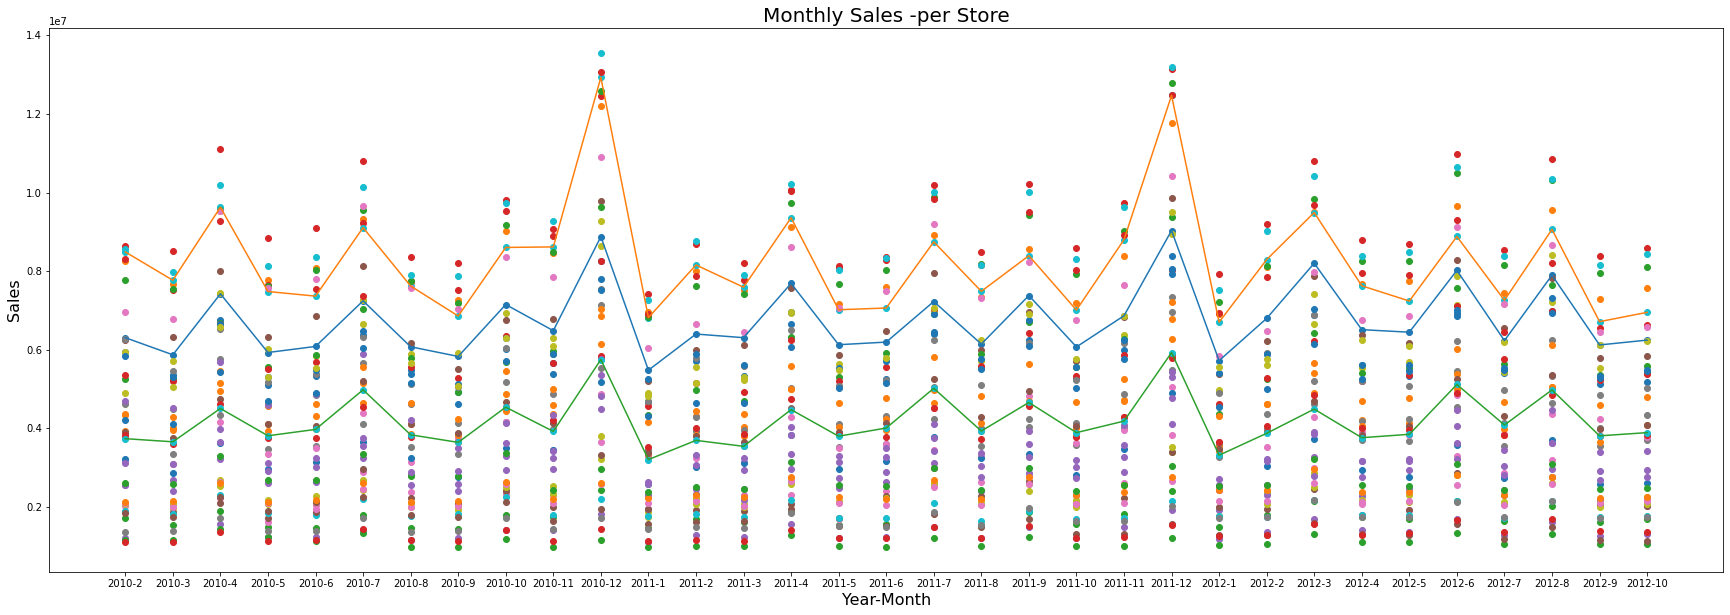

In [25]:
# Plot the scatter plot of Monthly Sales for each store
plt.figure(figsize=(30,10))
for i in range(1,46):
    _ = data_monthly_sales.loc[data_monthly_sales['Store']==i]
    plt.scatter(_['Year-Month'],_['Monthly_Sales'])
    # For ease of observation, select stores 1, 10, 40, and connect their points respectively
    if i in (1,10,40):
        plt.plot(_['Year-Month'],_['Monthly_Sales'])
        
plt.title('Monthly Sales -per Store', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Year-Month', fontsize=16)
plt.show()

From the above graph we find that the **regularity of the change** in monthly sales of each store is very **similar**. The monthly sales of **each store** are **cyclical**, reaching a **peak in December** and a **valley in January** of **each year**.

In [26]:
# Calculate and add the 'Monthly_Sales_All_Stores' column
data_monthly_sales['Monthly_Sales_All_Stores'] = data_monthly_sales.groupby(['Year-Month'])['Monthly_Sales'].transform('sum')
data_monthly_sales.head()

,Store,Year,Month,Monthly_Sales,Year-Month,Monthly_Sales_All_Stores
0,1,2010,2,6307344.10,2010-2,1.903330e+08
4,1,2010,3,5871293.98,2010-3,1.819198e+08
8,1,2010,4,7422801.92,2010-4,2.314124e+08
13,1,2010,5,5929938.64,2010-5,1.867109e+08
17,1,2010,6,6084081.46,2010-6,1.922462e+08


In [27]:
# Delete duplicate rows
data_monthly_sales_all = data_monthly_sales[['Year-Month','Monthly_Sales_All_Stores']].drop_duplicates(subset='Monthly_Sales_All_Stores')

In [28]:
data_monthly_sales_all.head()

,Year-Month,Monthly_Sales_All_Stores
0,2010-2,1.903330e+08
4,2010-3,1.819198e+08
8,2010-4,2.314124e+08
13,2010-5,1.867109e+08
17,2010-6,1.922462e+08


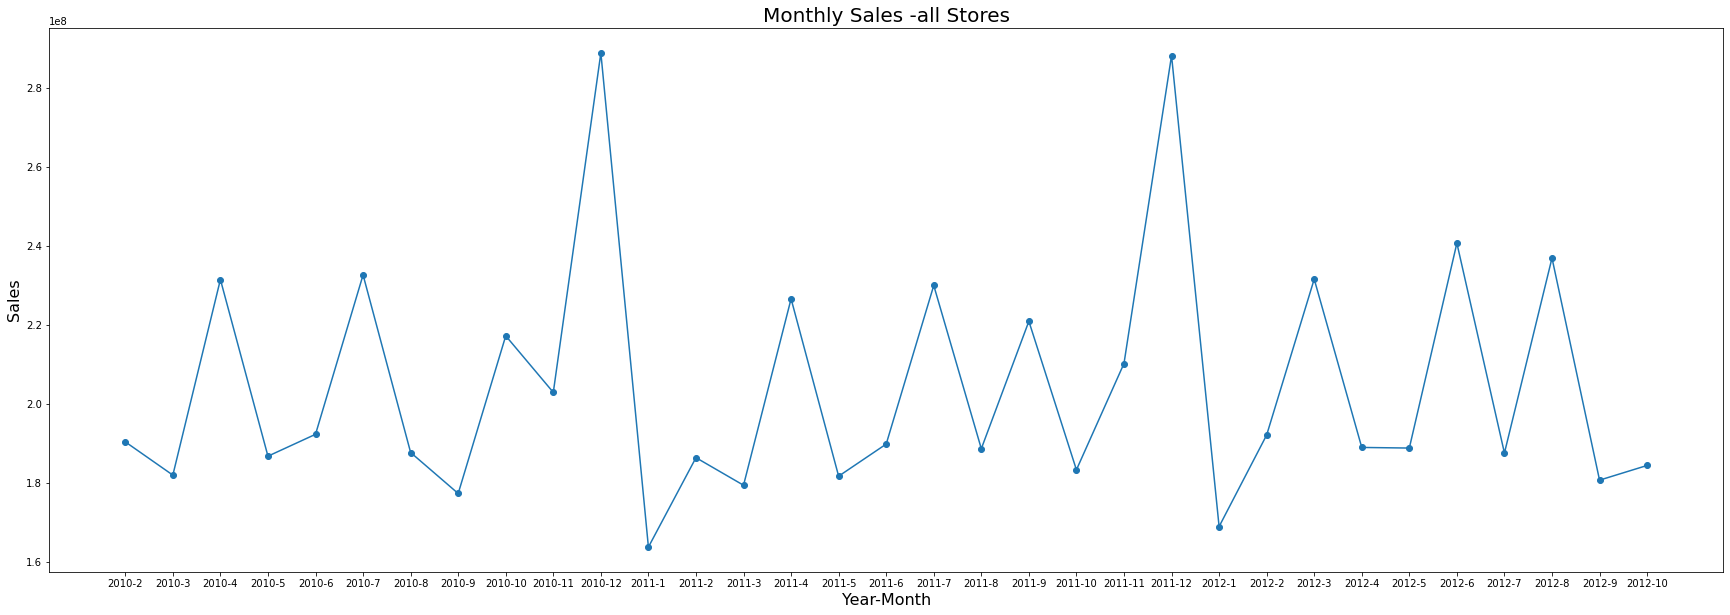

In [29]:
plt.figure(figsize=(30,10))
# Plot the scatter plot of Monthly Sales for all store
plt.scatter(data_monthly_sales_all['Year-Month'],data_monthly_sales_all['Monthly_Sales_All_Stores'])
# For ease of observation, connect the points 
plt.plot(data_monthly_sales_all['Year-Month'],data_monthly_sales_all['Monthly_Sales_All_Stores'])
plt.title('Monthly Sales -all Stores', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Year-Month', fontsize=16)
plt.show()

Similar to the previous graph, the change of monthly sales for **all stores** shows seasonality. The monthly sales of all stores reach a **peak in December** and a **valley in January** of **each year**.(You know...Black friday and Christmas!)

### 5.1.Can you predict Weekly Sales using other columns, either with a Random Forest Algorithm or a Support Vector Machine?

In [30]:
# load the dataset from local storage
data = pd.read_csv("../../data/WALMART_SALES_DATA.csv")

In [31]:
# View data type
data.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [32]:
# Convert the 'Date' feature from a 'string' type to a 'datetime' type
data['Date'] = pd.to_datetime(data['Date'])
data.head() 

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


We found **errors** in the 'Date' column!

In [33]:
# load the dataset from local storage again
data = pd.read_csv("../../data/WALMART_SALES_DATA.csv")

In [34]:
# Split the date and add columns
data['Year'] = data['Date'].str[6:10]
data['Month'] = data['Date'].str[3:5]
data['Day'] = data['Date'].str[0:2]
# Add 'Year_Month' column
data['Year_Month'] = data['Year'] + '-' + data['Month']
# Update 'Date' column
data['Date'] = data['Year'] + '-' + data['Month'] + '-' + data['Day']
# Convert features from 'string' type to 'int' type
data['Month'] = data['Month'].astype('int64')
data['Year'] = data['Year'].astype('int64')
data['Day'] = data['Day'].astype('int64')

In [35]:
data.head() 

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Year_Month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,2010-02
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12,2010-02
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,2010-02
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,2010-02
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5,2010-03


In [36]:
# Convert the 'Date' feature from a 'string' type to a 'datetime' type
data['Date'] = pd.to_datetime(data['Date'])

In [37]:
# Update 'Month' and 'Year_Month' columns
data['Month']= data.Date.dt.month
data['Year_Month'] = pd.to_datetime(data['Date']).dt.to_period('M')
# Add 'Week_of_Year' column
data['Week_of_Year']= data.Date.dt.week

<ipython-input-37-937e3551c356>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data['Week_of_Year']= data.Date.dt.week


In [38]:
data.head() 

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Year_Month,Week_of_Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,2010-02,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12,2010-02,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,2010-02,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,2010-02,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5,2010-03,9


In [39]:
# View data type
data.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
Year                     int64
Month                    int64
Day                      int64
Year_Month           period[M]
Week_of_Year             int64
dtype: object

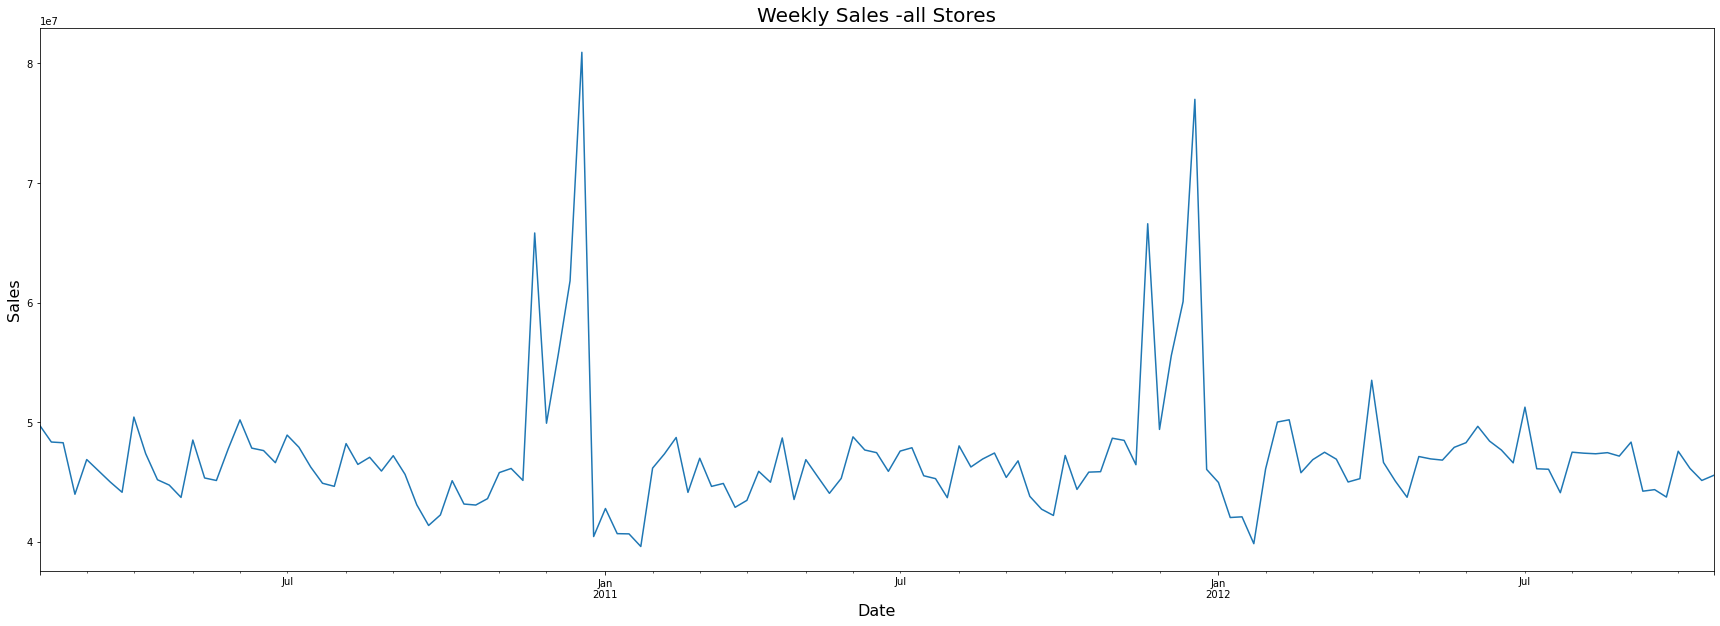

In [40]:
# Calculate and plot the Weekly Sales for all store
weekly_sales_all = data.groupby('Date')['Weekly_Sales'].sum()
weekly_sales_all.plot(figsize=(30,10))
plt.title('Weekly Sales -all Stores', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.show()

In [41]:
# Select the required columns for prediction and generate a new dataframe
data_pre = data.drop(['Fuel_Price','Year','Day','Year_Month','Temperature','CPI','Unemployment'], axis = 1)

In [42]:
data_pre.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Month,Week_of_Year
0,1,2010-02-05,1643690.90,0,2,5
1,1,2010-02-12,1641957.44,1,2,6
2,1,2010-02-19,1611968.17,0,2,7
3,1,2010-02-26,1409727.59,0,2,8
4,1,2010-03-05,1554806.68,0,3,9


In [43]:
# Split the training set and test set
all_train = data_pre[data_pre.Date<'2012-01-01']
all_test = data_pre[data_pre.Date>='2012-01-01']
X_train = all_train.drop(['Date','Weekly_Sales'], axis = 1)
X_test = all_test.drop(['Date','Weekly_Sales'], axis = 1)
y_train = all_train['Weekly_Sales']
y_test = all_test['Weekly_Sales']

In [44]:
# Create a Random Forest Regressor
rf_model = RandomForestRegressor()
# Fit the data to the model
rf_model.fit(X_train, y_train)
#Get the prediction values
rf_model_pre = rf_model.predict(X_test)
#Calculate R2 Score
print('R2 Score:', r2_score(y_test, rf_model_pre))

R2 Score: 0.9698615134041219


The closer the **R2 score** is to **1**, the **better** our model fits.

In [45]:
# Generate a new dataframe, including actual sales and predicted sales, etc.
rf_pre = pd.DataFrame({'Weekly_Sales':y_test.values, 'Weekly_Sales_Pre': rf_model_pre}, index = y_test.index)
rf_pre_data = pd.merge(rf_pre, data_pre[['Date', 'Store']],left_index = True, right_index = True)

In [46]:
rf_pre_data.head()

,Weekly_Sales,Weekly_Sales_Pre,Date,Store
100,1550369.92,1.415630e+06,2012-01-06,1
101,1459601.17,1.396829e+06,2012-01-13,1
102,1394393.84,1.342491e+06,2012-01-20,1
103,1319325.59,1.342444e+06,2012-01-27,1
104,1636339.65,1.614738e+06,2012-02-03,1


<ipython-input-47-c7da161a1a96>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pre_sales = rf_pre_data.groupby('Date')['Weekly_Sales','Weekly_Sales_Pre'].sum()


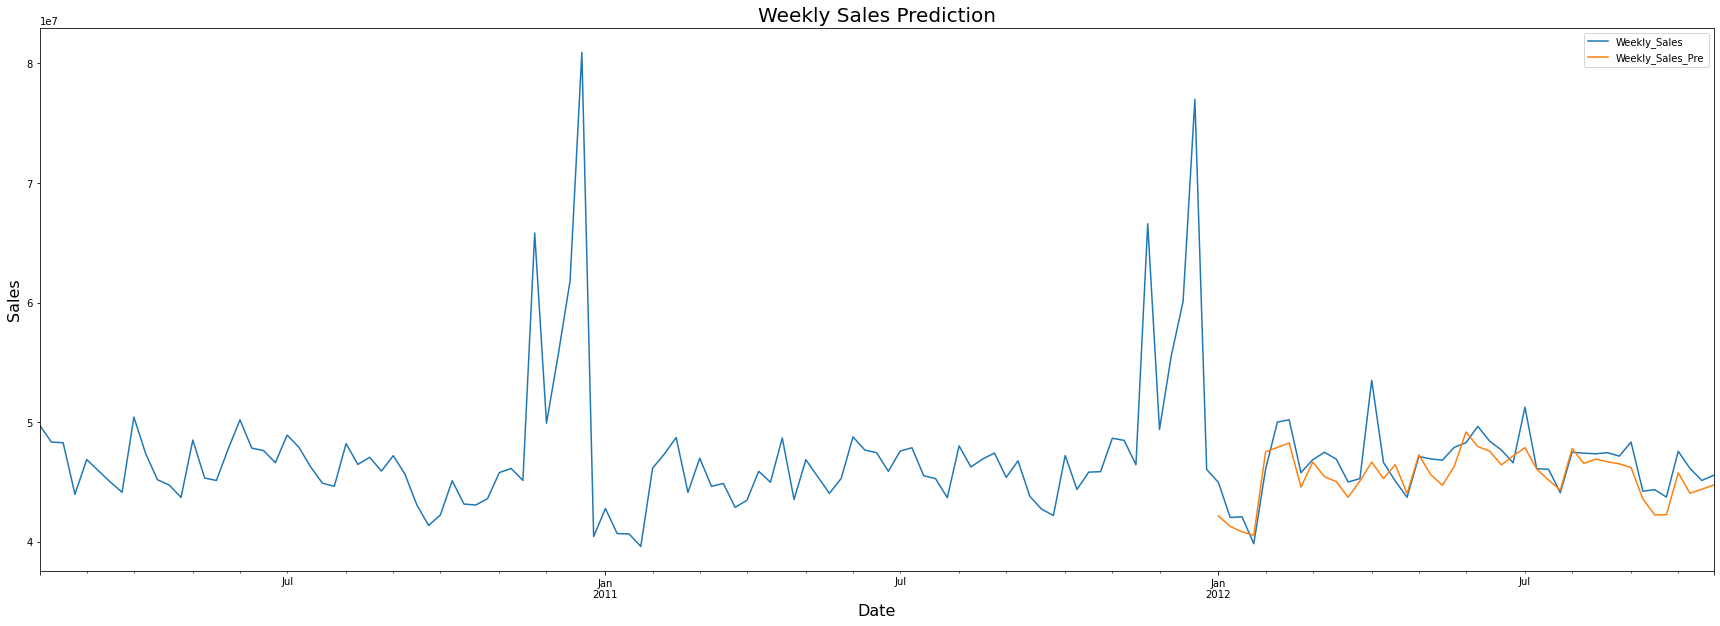

In [47]:
# Calculate and plot the Weekly Sales(actual vs preditcted) for all store
pre_sales = rf_pre_data.groupby('Date')['Weekly_Sales','Weekly_Sales_Pre'].sum()
actual_sales = data_pre.groupby('Date')['Weekly_Sales'].sum()
actual_sales.plot(figsize = (30,10), legend = True)
pre_sales['Weekly_Sales_Pre'].plot(legend = True)
plt.title('Weekly Sales Prediction', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.show()

### 5.2.Sometimes predictions from other columns is challenging. In that case, model Weekly Sales column for years 2010 and 2011 with pymc3 and use that model to predict sales for every month in 2012. It's ok if your histogram is not exactly simgle-humped, as long as a single hump is a sufficiently good approximation.